In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f383ca091f30d752f3f0cd7d2b008b4


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):

        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | castro
Processing Record 12 of Set 13 | puerto ayora
Processing Record 13 of Set 13 | thompson
Processing Record 14 of Set 13 | avarua
Processing Record 15 of Set 13 | jamestown
Processing Record 16 of Set 13 | saint-philippe
Processing Record 17 of Set 13 | blackwater
Processing Record 18 of Set 13 | lompoc
Processing Record 19 of Set 13 | mullaitivu
City not found. Skipping...
Processing Record 20 of Set 13 | maromitsa
Processing Record 21 of Set 13 | atuona
Processing Record 22 of Set 13 | puerto madero
Processing Record 23 of Set 13 | vikhorevka
Processing Record 24 of Set 13 | kapaa
Processing Record 25 of Set 13 | college
Processing Record 26 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 27 of Set 13 | barrow
Processing Record 28 of Set 13 | marathon
Processing Record 29 of Set 13 | gualeguay
Processing Record 30 of Set 13 | alice springs
Processing Record 31 of Set 13 | najran
Pro

Processing Record 33 of Set 16 | dikson
Processing Record 34 of Set 16 | gigmoto
Processing Record 35 of Set 16 | entre rios
Processing Record 36 of Set 16 | pokrovskoye
Processing Record 37 of Set 16 | shakawe
Processing Record 38 of Set 16 | naze
Processing Record 39 of Set 16 | juneau
Processing Record 40 of Set 16 | saskylakh
Processing Record 41 of Set 16 | lasa
Processing Record 42 of Set 16 | villa maria
Processing Record 43 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 16 | guerrero negro
Processing Record 45 of Set 16 | kampot
Processing Record 46 of Set 16 | bredasdorp
Processing Record 47 of Set 16 | myitkyina
Processing Record 48 of Set 16 | tabou
Processing Record 49 of Set 16 | araouane
Processing Record 50 of Set 16 | san cristobal
Processing Record 1 of Set 17 | gurupa
Processing Record 2 of Set 17 | horizontina
Processing Record 3 of Set 17 | khatanga
Processing Record 4 of Set 17 | granadilla de abona
Processing Record 5 of Set 17 | b

Processing Record 22 of Set 20 | lanzhou
Processing Record 23 of Set 20 | jos
Processing Record 24 of Set 20 | pestovo
Processing Record 25 of Set 20 | telc
Processing Record 26 of Set 20 | aasiaat
Processing Record 27 of Set 20 | kasangulu
Processing Record 28 of Set 20 | madikeri
Processing Record 29 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 20 | north bend
Processing Record 31 of Set 20 | sinaloa
Processing Record 32 of Set 20 | mariestad
Processing Record 33 of Set 20 | wittenheim
Processing Record 34 of Set 20 | utinga
Processing Record 35 of Set 20 | taree
Processing Record 36 of Set 20 | nelson bay
Processing Record 37 of Set 20 | sayyan
Processing Record 38 of Set 20 | shahrud
Processing Record 39 of Set 20 | port blair
Processing Record 40 of Set 20 | puerto penasco
Processing Record 41 of Set 20 | miraflores
Processing Record 42 of Set 20 | anadyr
Processing Record 43 of Set 20 | east london
Processing Record 44 of Set 20 | fairbanks
Process

Processing Record 7 of Set 24 | miri
Processing Record 8 of Set 24 | khonuu
City not found. Skipping...
Processing Record 9 of Set 24 | muroto
Processing Record 10 of Set 24 | manakara
Processing Record 11 of Set 24 | julio de castilhos
Processing Record 12 of Set 24 | tura
Processing Record 13 of Set 24 | sumbe
Processing Record 14 of Set 24 | bahia blanca
Processing Record 15 of Set 24 | tahta
Processing Record 16 of Set 24 | labytnangi
Processing Record 17 of Set 24 | rujewa
Processing Record 18 of Set 24 | riberalta
Processing Record 19 of Set 24 | kibre mengist
Processing Record 20 of Set 24 | kupang
Processing Record 21 of Set 24 | muros
Processing Record 22 of Set 24 | yerbogachen
Processing Record 23 of Set 24 | chase
Processing Record 24 of Set 24 | sfantu gheorghe
Processing Record 25 of Set 24 | dubti
Processing Record 26 of Set 24 | hihifo
City not found. Skipping...
Processing Record 27 of Set 24 | mareeba
Processing Record 28 of Set 24 | san pedro
Processing Record 29 of 

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia,14.9215,-23.5087,81.14,69,20,14.97,CV,2021-07-22 19:35:07
1,Ushuaia,-54.8000,-68.3000,42.46,75,40,4.61,AR,2021-07-22 19:38:12
2,Castro,-24.7911,-50.0119,60.08,58,0,4.88,BR,2021-07-22 19:38:13
3,Puerto Ayora,-0.7393,-90.3518,82.36,87,96,8.01,EC,2021-07-22 19:38:13
4,Thompson,55.7435,-97.8558,80.76,54,20,5.75,CA,2021-07-22 19:38:14
5,Avarua,-21.2078,-159.7750,77.05,83,17,6.91,CK,2021-07-22 19:33:27
6,Jamestown,42.0970,-79.2353,74.30,50,1,5.99,US,2021-07-22 19:38:15
7,Saint-Philippe,-21.3585,55.7679,67.55,75,42,12.08,RE,2021-07-22 19:38:15
8,Blackwater,-23.5833,148.8833,48.85,79,0,6.29,AU,2021-07-22 19:38:16
9,Lompoc,34.6391,-120.4579,88.70,72,75,16.11,US,2021-07-22 19:38:17


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Praia,CV,2021-07-22 19:35:07,14.9215,-23.5087,81.14,69,20,14.97
1,Ushuaia,AR,2021-07-22 19:38:12,-54.8000,-68.3000,42.46,75,40,4.61
2,Castro,BR,2021-07-22 19:38:13,-24.7911,-50.0119,60.08,58,0,4.88
3,Puerto Ayora,EC,2021-07-22 19:38:13,-0.7393,-90.3518,82.36,87,96,8.01
4,Thompson,CA,2021-07-22 19:38:14,55.7435,-97.8558,80.76,54,20,5.75
...,...,...,...,...,...,...,...,...,...
555,Churapcha,RU,2021-07-22 19:43:41,62.0025,132.4325,61.16,78,100,1.05
556,Hegang,CN,2021-07-22 19:43:41,47.4000,130.3667,72.84,79,97,2.64
557,Markapur,IN,2021-07-22 19:43:42,15.7333,79.2833,76.51,78,100,20.11
558,Manokwari,ID,2021-07-22 19:43:42,-0.8667,134.0833,77.85,82,86,5.97


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


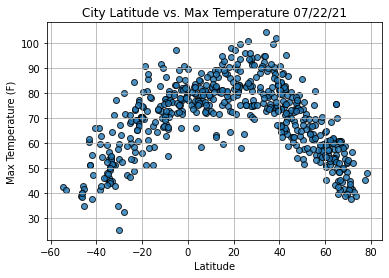

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


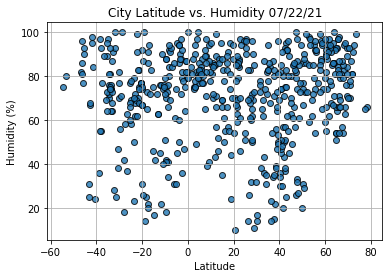

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

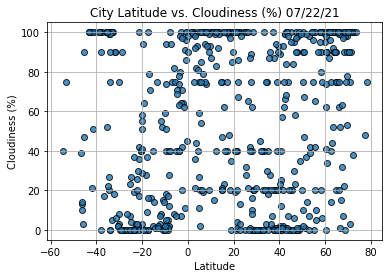

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


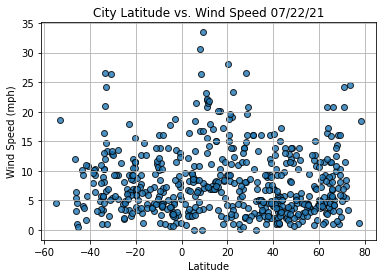

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
index13 = city_data_df.loc[13]
index13

City                   Vikhorevka
Country                        RU
Date          2021-07-22 19:38:19
Lat                       56.1201
Lng                      101.1636
Max Temp                    54.99
Humidity                       91
Cloudiness                     10
Wind Speed                   3.71
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
555     True
556     True
557     True
558    False
559     True
Name: Lat, Length: 560, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia,14.9215,-23.5087,81.14,69,20,14.97,CV,2021-07-22 19:35:07
4,Thompson,55.7435,-97.8558,80.76,54,20,5.75,CA,2021-07-22 19:38:14
6,Jamestown,42.0970,-79.2353,74.30,50,1,5.99,US,2021-07-22 19:38:15
9,Lompoc,34.6391,-120.4579,88.70,72,75,16.11,US,2021-07-22 19:38:17
10,Maromitsa,59.8683,48.0123,54.52,59,95,4.21,RU,2021-07-22 19:38:17
...,...,...,...,...,...,...,...,...,...
554,Kralendijk,12.1500,-68.2667,87.78,66,40,21.85,BQ,2021-07-22 19:43:40
555,Churapcha,62.0025,132.4325,61.16,78,100,1.05,RU,2021-07-22 19:43:41
556,Hegang,47.4000,130.3667,72.84,79,97,2.64,CN,2021-07-22 19:43:41
557,Markapur,15.7333,79.2833,76.51,78,100,20.11,IN,2021-07-22 19:43:42


In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia,14.9215,-23.5087,81.14,69,20,14.97,CV,2021-07-22 19:35:07
4,Thompson,55.7435,-97.8558,80.76,54,20,5.75,CA,2021-07-22 19:38:14
6,Jamestown,42.0970,-79.2353,74.30,50,1,5.99,US,2021-07-22 19:38:15
9,Lompoc,34.6391,-120.4579,88.70,72,75,16.11,US,2021-07-22 19:38:17
10,Maromitsa,59.8683,48.0123,54.52,59,95,4.21,RU,2021-07-22 19:38:17


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

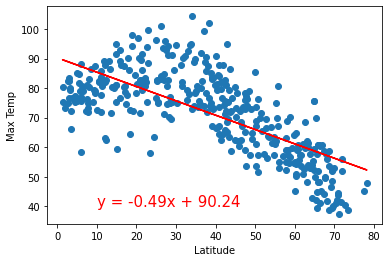

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(10,40))
plt.show()

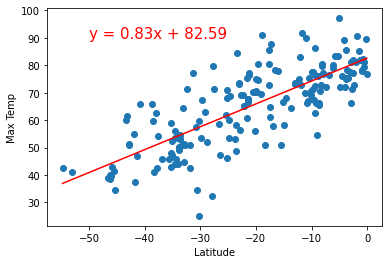

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


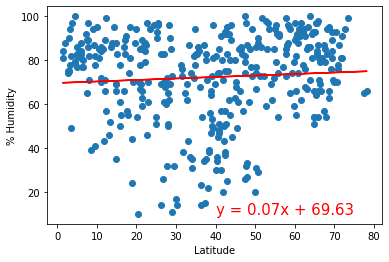

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

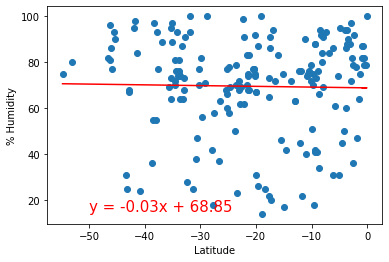

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for % Humidity", '% Humidity',(-50,15))

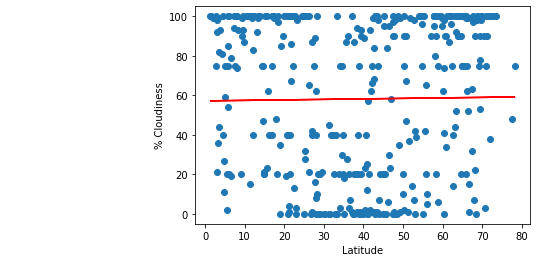

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

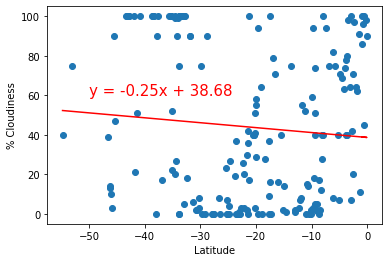

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

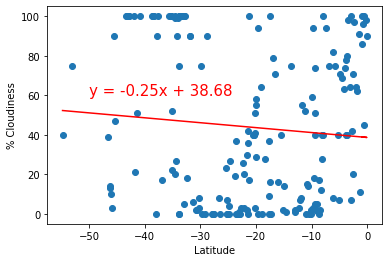

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))